# Is Proactive Policing Effective?
Loren Atherley, Carl Sharpe & Chris Fisher

In [1]:
from IPython.display import HTML, display
display(HTML("<style>.container { width:100% !important; }</style>")) 

## Probabalistic Time Series Analysis

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA


df = pd.read_excel('timeseries.xlsx')
df.index = pd.DatetimeIndex(data = df['Date'], freq="d", start = 0, periods = 3321)
df.drop(columns = ['Date'])

df[['Call Rate','Crime Rate']].plot(figsize=(12,8))
plt.xlabel('Date')
plt.title('Crime / Call Rate Plot')
plt.ylabel('Rate')
df[['Person Rate','Property Rate','Society Rate']].plot(figsize=(12,8))
plt.xlabel('Date')
plt.title('Crime Rates Plot - by Crime Group')
plt.ylabel('Rate')
df[['Onview Rate','Dispatch Rate']].plot(figsize=(12,8))
plt.xlabel('Date')
plt.title('Call Rates - by Call Type')
plt.ylabel('Rate')

Text(0,0.5,'Rate')

### Auto Correlation and Partial Autocorrelation Plots 

Crime Rate


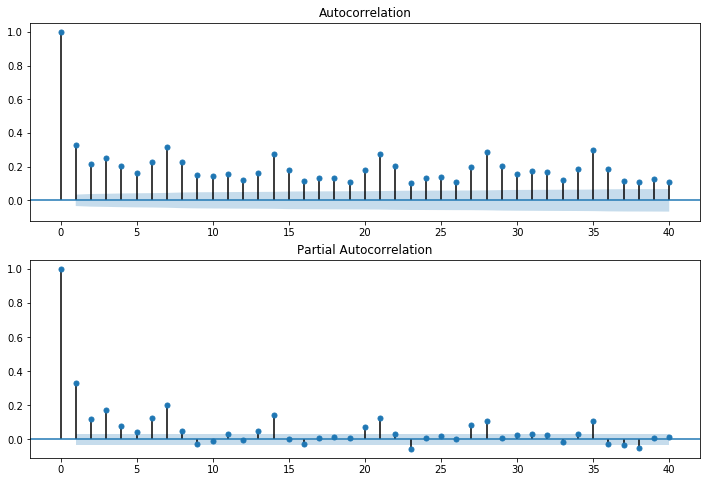

Call Rate


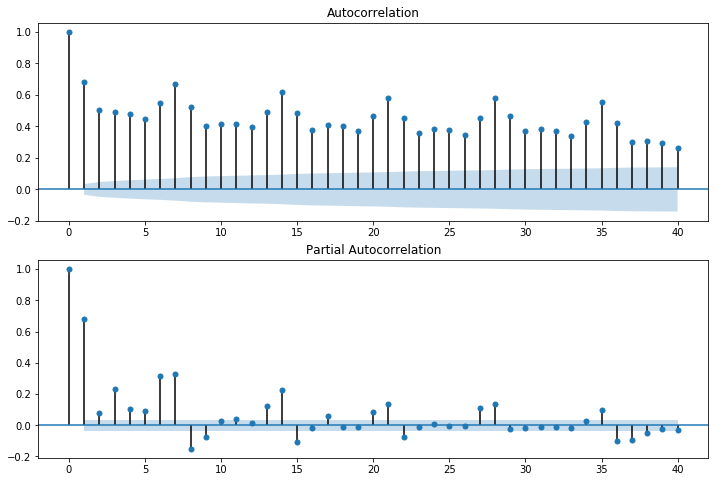

Person Rate


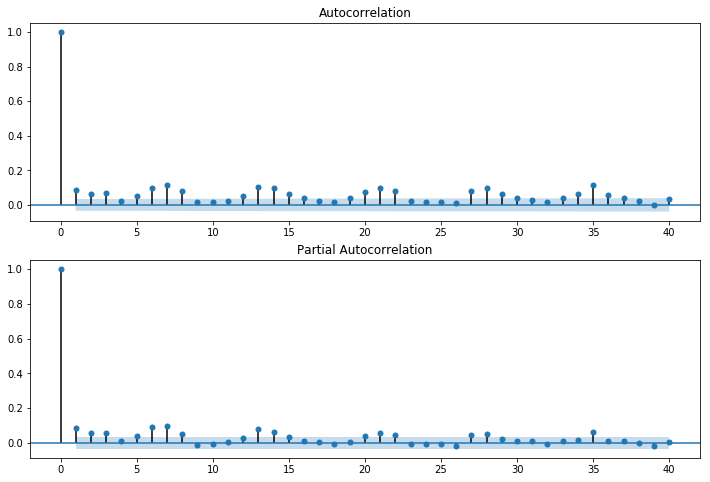

Property Rate


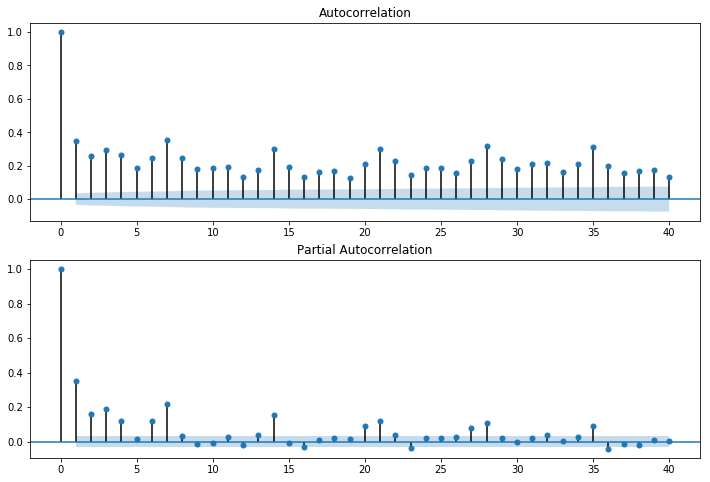

Society Rate


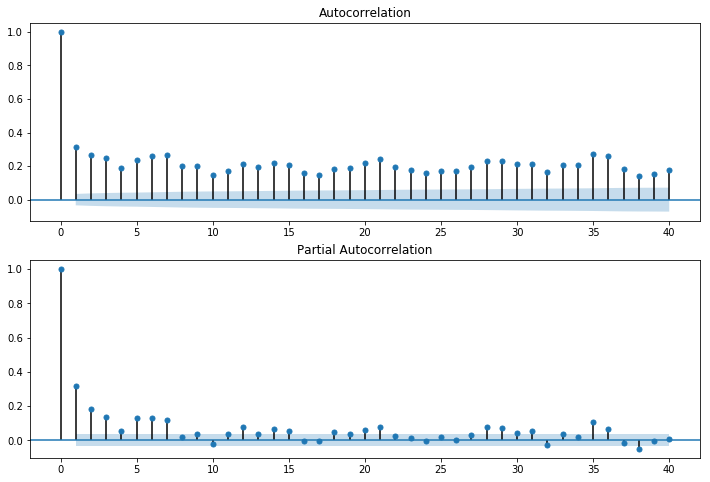

Onview Rate


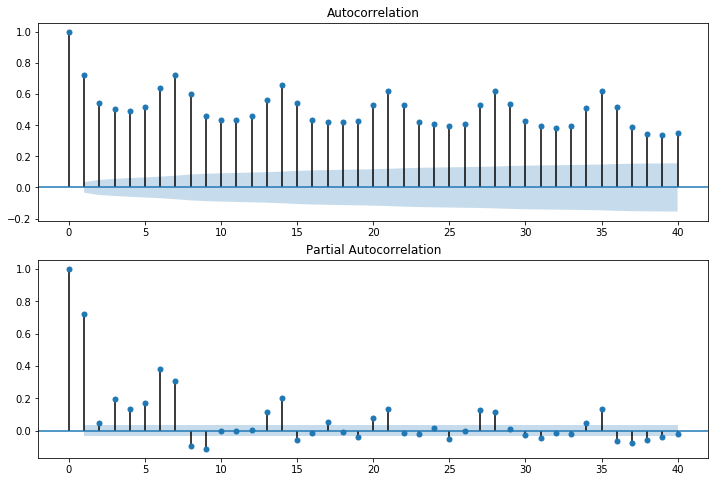

Dispatch Rate


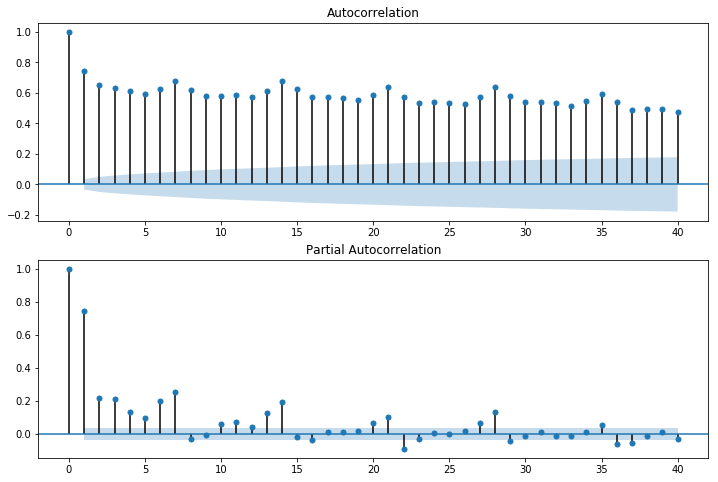

In [3]:
def auto_partial_autocorrelation(timeseries):

    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(timeseries, lags = 40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(timeseries, lags = 40, ax=ax2)
    ax1.set_title('Autocorrelation') 
    ax2.set_title('Partial Autocorrelation')
    plt.show()

print('Crime Rate')
auto_partial_autocorrelation(df['Crime Rate'])    
print('Call Rate')
auto_partial_autocorrelation(df['Call Rate'])
print('Person Rate')
auto_partial_autocorrelation(df['Person Rate'])
print('Property Rate')
auto_partial_autocorrelation(df['Property Rate'])
print('Society Rate')
auto_partial_autocorrelation(df['Society Rate'])
print('Onview Rate')
auto_partial_autocorrelation(df['Onview Rate'])
print('Dispatch Rate')
auto_partial_autocorrelation(df['Dispatch Rate'])

### Test for Stationarity

Crime Rate


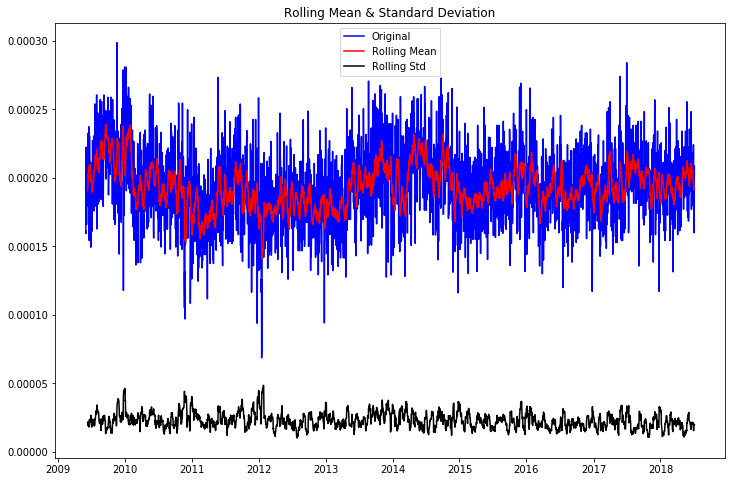

Results of Dickey-Fuller Test:
Test Statistic                   -4.925528
p-value                           0.000031
#Lags Used                       27.000000
Number of Observations Used    3293.000000
Critical Value (1%)              -3.432337
Critical Value (5%)              -2.862418
Critical Value (10%)             -2.567237
dtype: float64
 
Call Rate


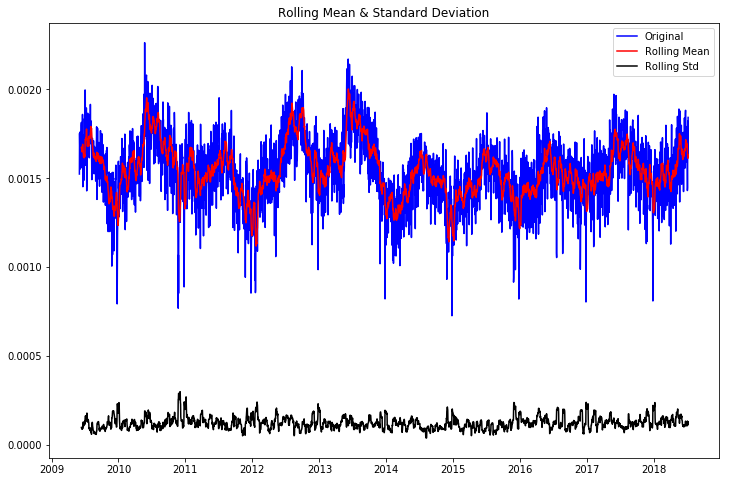

Results of Dickey-Fuller Test:
Test Statistic                   -3.340854
p-value                           0.013148
#Lags Used                       27.000000
Number of Observations Used    3293.000000
Critical Value (1%)              -3.432337
Critical Value (5%)              -2.862418
Critical Value (10%)             -2.567237
dtype: float64
 
Person Rate


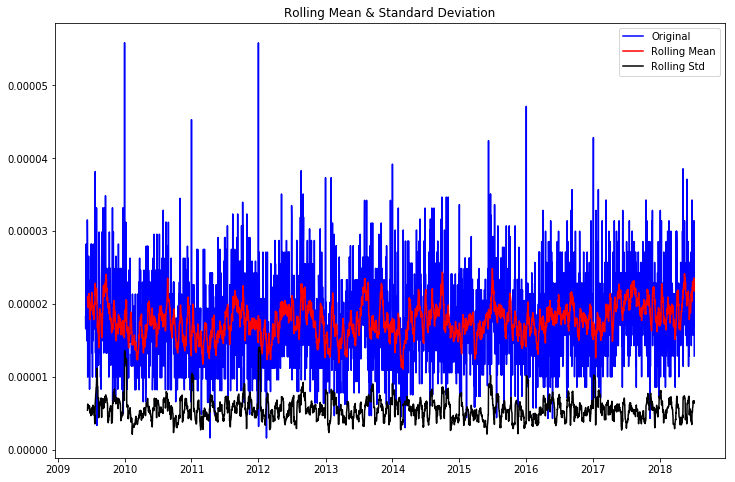

Results of Dickey-Fuller Test:
Test Statistic                -6.924194e+00
p-value                        1.126275e-09
#Lags Used                     2.700000e+01
Number of Observations Used    3.293000e+03
Critical Value (1%)           -3.432337e+00
Critical Value (5%)           -2.862418e+00
Critical Value (10%)          -2.567237e+00
dtype: float64
 
Property Rate


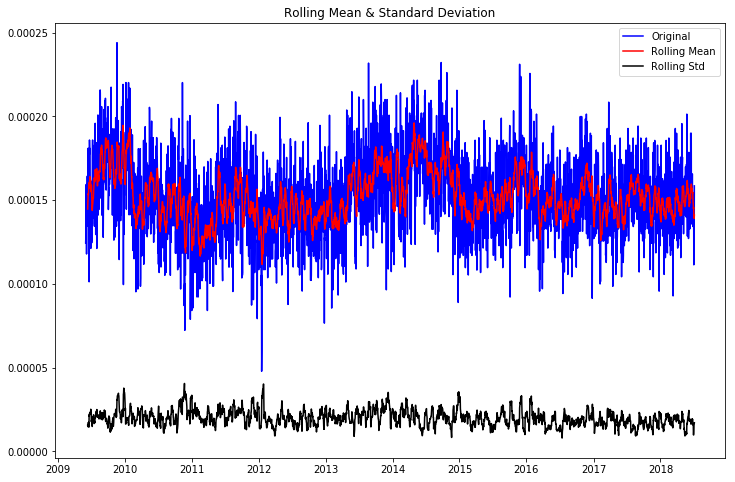

Results of Dickey-Fuller Test:
Test Statistic                   -4.467694
p-value                           0.000225
#Lags Used                       27.000000
Number of Observations Used    3293.000000
Critical Value (1%)              -3.432337
Critical Value (5%)              -2.862418
Critical Value (10%)             -2.567237
dtype: float64
 
Society Rate


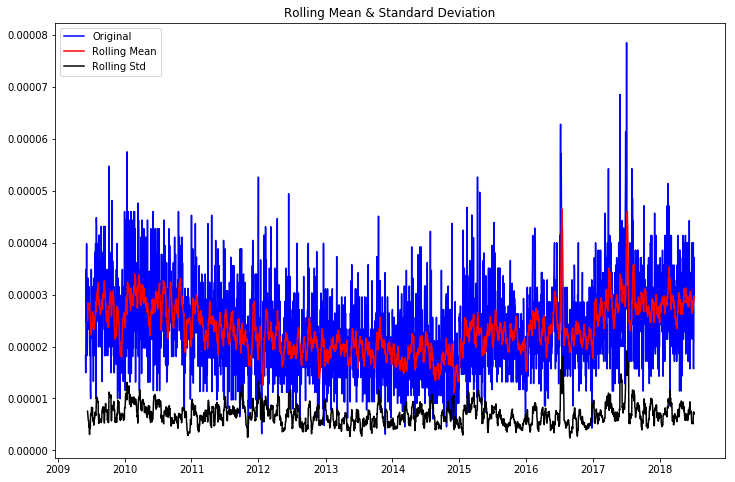

Results of Dickey-Fuller Test:
Test Statistic                   -4.132956
p-value                           0.000854
#Lags Used                       29.000000
Number of Observations Used    3291.000000
Critical Value (1%)              -3.432339
Critical Value (5%)              -2.862419
Critical Value (10%)             -2.567238
dtype: float64
 
Onview Rate


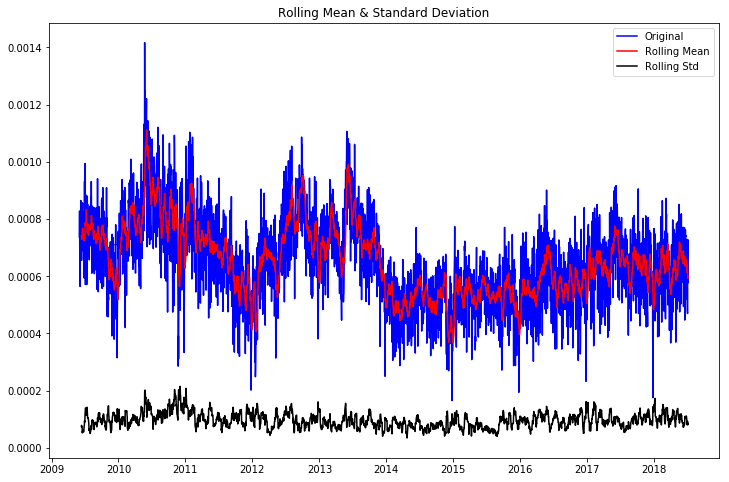

Results of Dickey-Fuller Test:
Test Statistic                   -3.193775
p-value                           0.020348
#Lags Used                       27.000000
Number of Observations Used    3293.000000
Critical Value (1%)              -3.432337
Critical Value (5%)              -2.862418
Critical Value (10%)             -2.567237
dtype: float64
 
Dispatch Rate


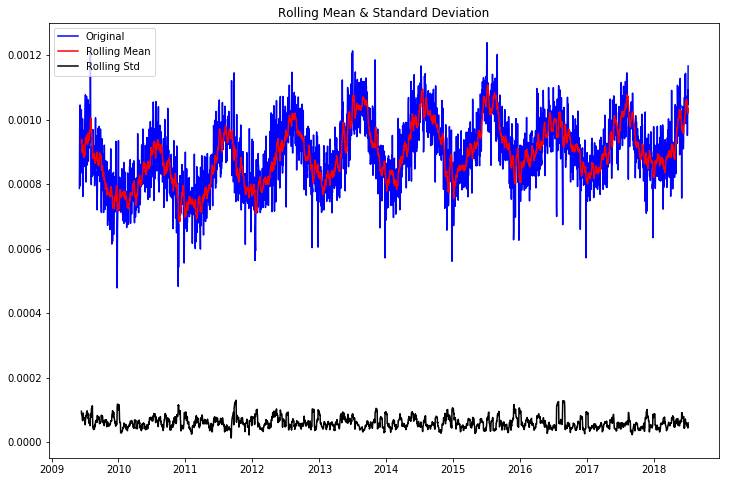

Results of Dickey-Fuller Test:
Test Statistic                   -2.515565
p-value                           0.111733
#Lags Used                       28.000000
Number of Observations Used    3292.000000
Critical Value (1%)              -3.432338
Critical Value (5%)              -2.862418
Critical Value (10%)             -2.567238
dtype: float64


In [4]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

print('Crime Rate')
test_stationarity(df['Crime Rate'])
print(' ')
print('Call Rate')
test_stationarity(df['Call Rate'])
print(' ')
print('Person Rate')
test_stationarity(df['Person Rate'])
print(' ')
print('Property Rate')
test_stationarity(df['Property Rate'])
print(' ')
print('Society Rate')
test_stationarity(df['Society Rate'])
print(' ')
print('Onview Rate')
test_stationarity(df['Onview Rate'])
print(' ')
print('Dispatch Rate')
test_stationarity(df['Dispatch Rate'])

### Dispatch Rate Not Stationary (cannot reject null hypothesis) - Estimate and Eliminate Trend

Log Transformation

Dispatch Rate Log


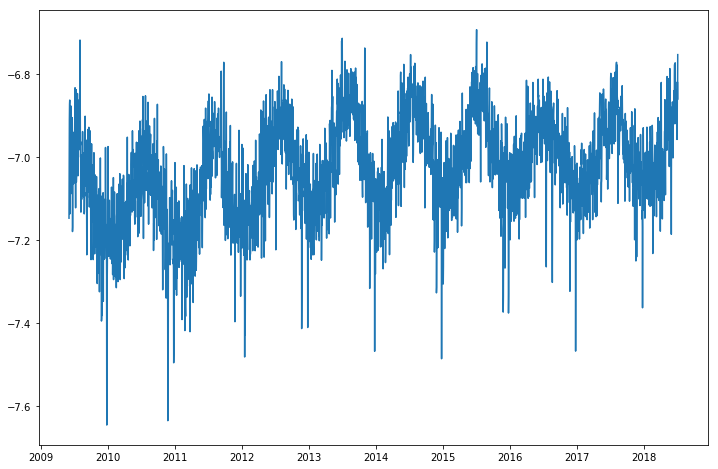

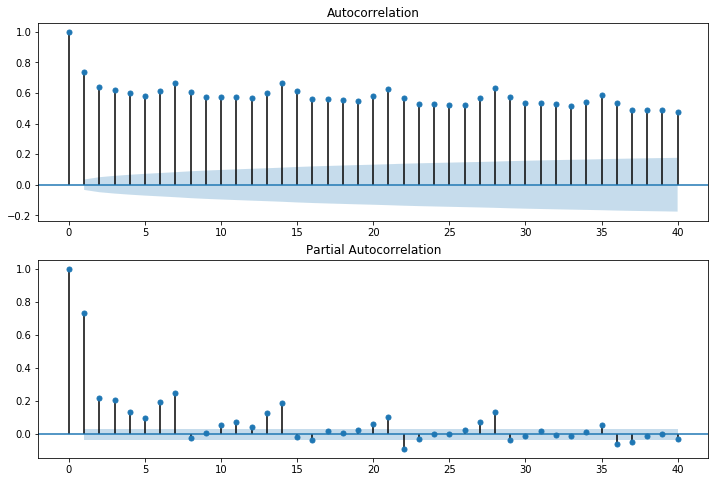

Dispatch Rate Log


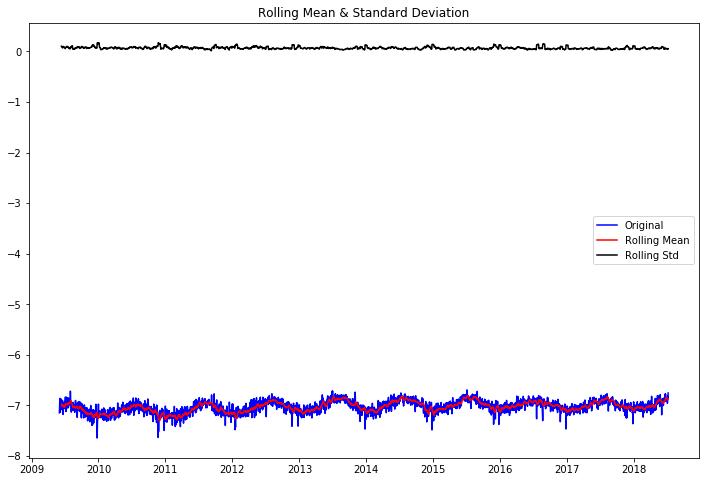

Results of Dickey-Fuller Test:
Test Statistic                   -2.517340
p-value                           0.111312
#Lags Used                       28.000000
Number of Observations Used    3292.000000
Critical Value (1%)              -3.432338
Critical Value (5%)              -2.862418
Critical Value (10%)             -2.567238
dtype: float64


In [5]:
dr_log = np.log(df['Dispatch Rate'])
fig = plt.figure(figsize=(12,8))
plt.plot(dr_log)

print('Dispatch Rate Log')
auto_partial_autocorrelation(dr_log)

print('Dispatch Rate Log')
test_stationarity(dr_log)


Moving Average

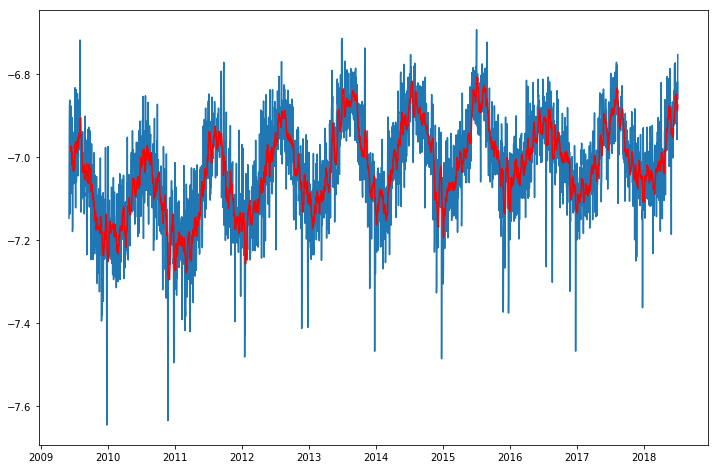

In [6]:
moving_avg = dr_log.rolling(12).mean()
fig = plt.figure(figsize=(12,8))
plt.plot(dr_log)
plt.plot(moving_avg, color='red')


<Figure size 864x576 with 0 Axes>

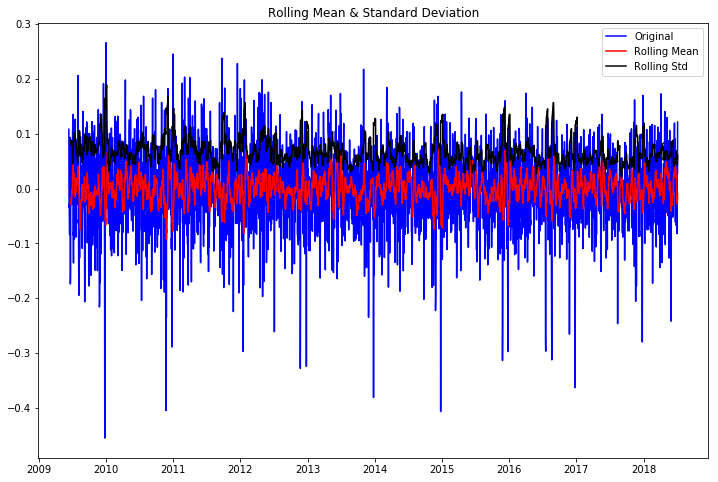

Results of Dickey-Fuller Test:
Test Statistic                -1.248639e+01
p-value                        3.012148e-23
#Lags Used                     2.800000e+01
Number of Observations Used    3.281000e+03
Critical Value (1%)           -3.432345e+00
Critical Value (5%)           -2.862421e+00
Critical Value (10%)          -2.567239e+00
dtype: float64


In [7]:
dr_log_moving_avg_diff = dr_log - moving_avg
dr_log_moving_avg_diff.head(12)
fig = plt.figure(figsize=(12,8))

dr_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(dr_log_moving_avg_diff)

### Eliminate Trend and Seasonality

Differencing

Crime Differenced


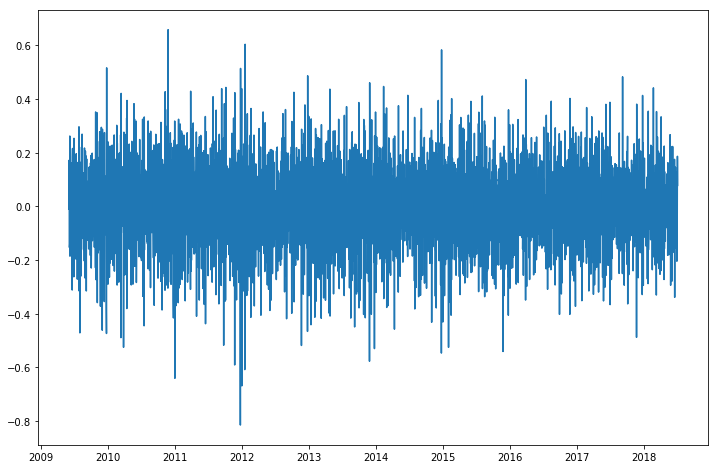

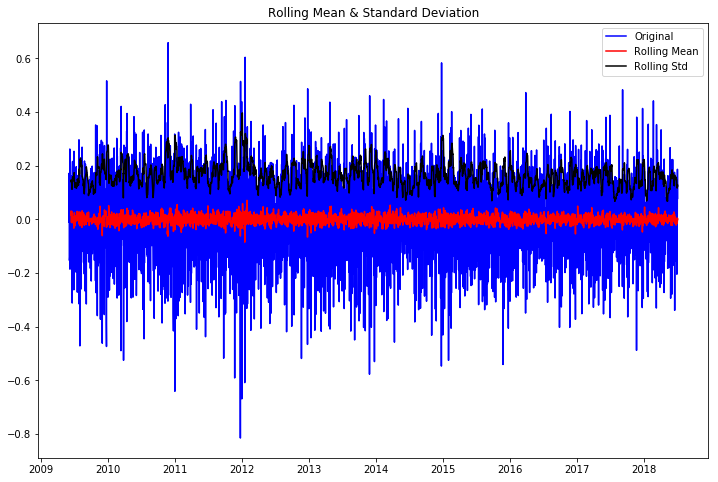

Results of Dickey-Fuller Test:
Test Statistic                -1.832471e+01
p-value                        2.262110e-30
#Lags Used                     2.900000e+01
Number of Observations Used    3.290000e+03
Critical Value (1%)           -3.432339e+00
Critical Value (5%)           -2.862419e+00
Critical Value (10%)          -2.567238e+00
dtype: float64
 
Person Differenced


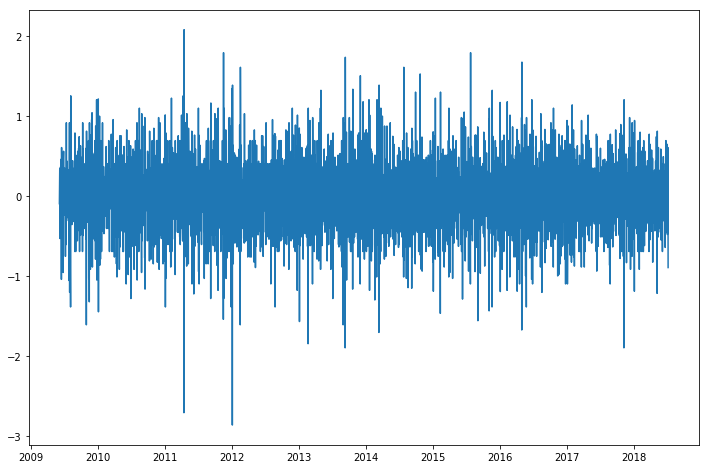

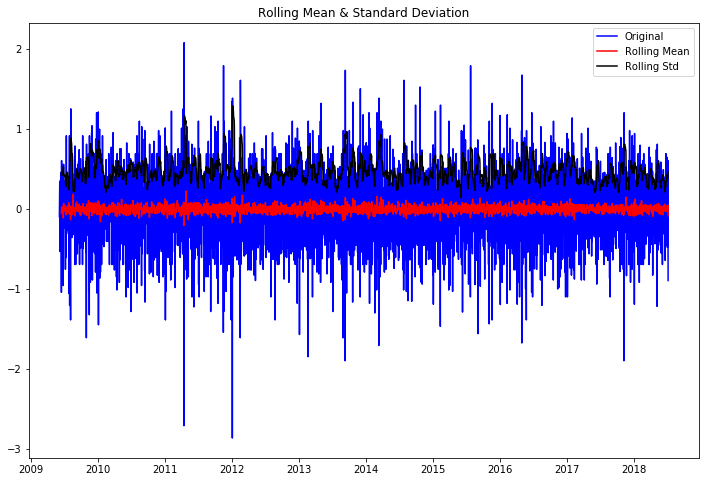

Results of Dickey-Fuller Test:
Test Statistic                -1.761631e+01
p-value                        3.857816e-30
#Lags Used                     2.900000e+01
Number of Observations Used    3.290000e+03
Critical Value (1%)           -3.432339e+00
Critical Value (5%)           -2.862419e+00
Critical Value (10%)          -2.567238e+00
dtype: float64
 
Property Differenced


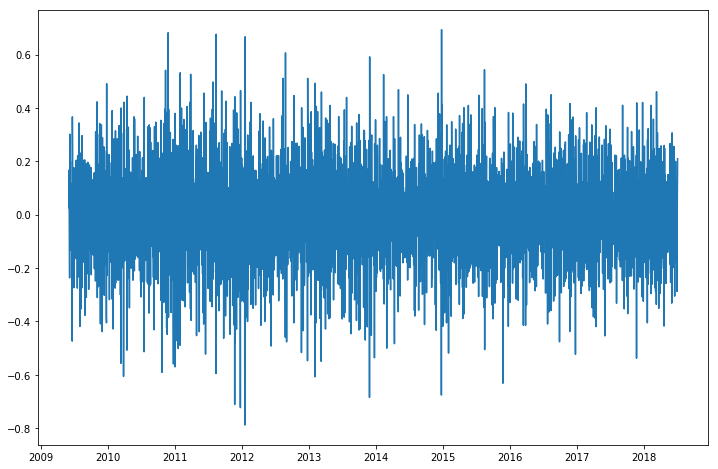

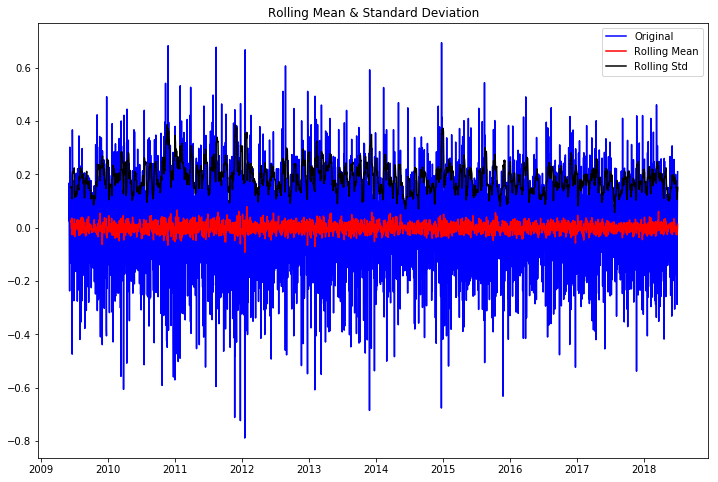

Results of Dickey-Fuller Test:
Test Statistic                  -20.304346
p-value                           0.000000
#Lags Used                       26.000000
Number of Observations Used    3293.000000
Critical Value (1%)              -3.432337
Critical Value (5%)              -2.862418
Critical Value (10%)             -2.567237
dtype: float64
 
Society Differenced


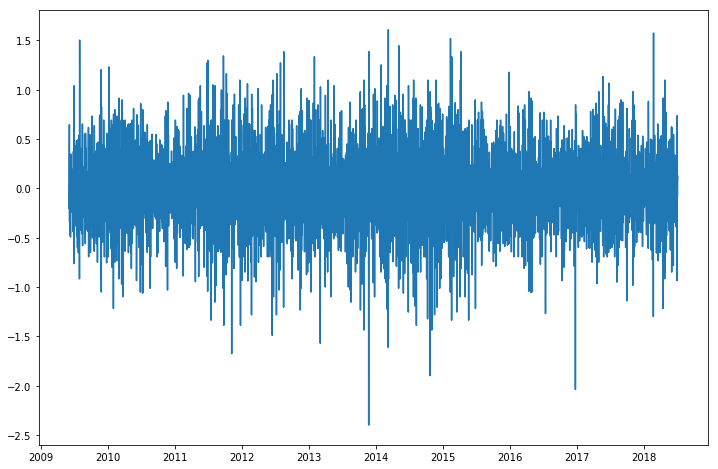

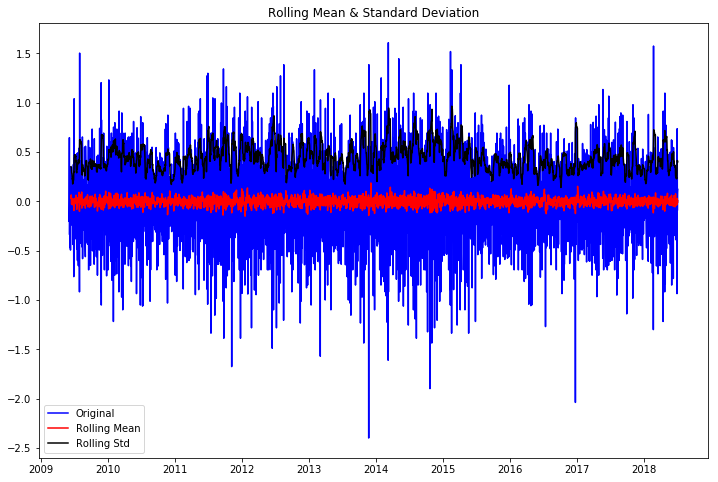

Results of Dickey-Fuller Test:
Test Statistic                  -19.030667
p-value                           0.000000
#Lags Used                       29.000000
Number of Observations Used    3290.000000
Critical Value (1%)              -3.432339
Critical Value (5%)              -2.862419
Critical Value (10%)             -2.567238
dtype: float64
 
Call Differenced


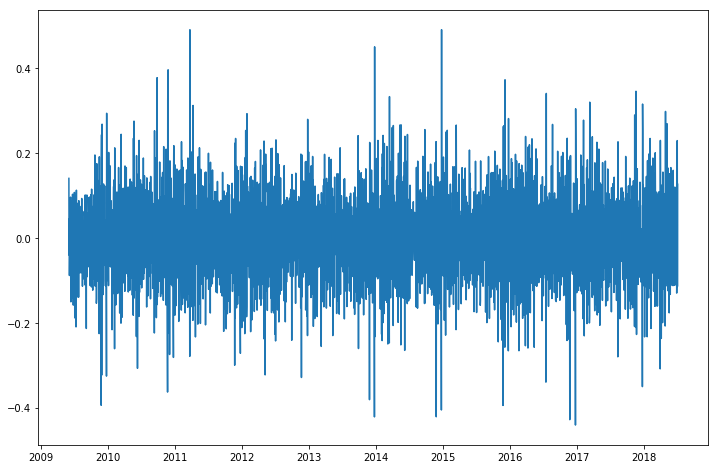

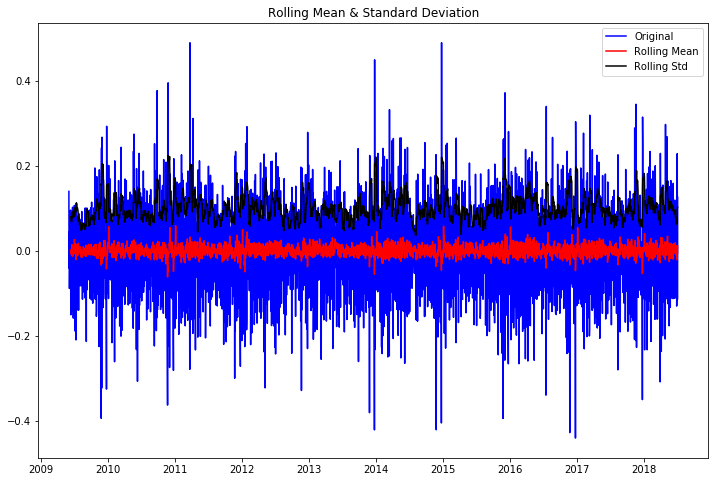

Results of Dickey-Fuller Test:
Test Statistic                -1.782754e+01
p-value                        3.142895e-30
#Lags Used                     2.700000e+01
Number of Observations Used    3.292000e+03
Critical Value (1%)           -3.432338e+00
Critical Value (5%)           -2.862418e+00
Critical Value (10%)          -2.567238e+00
dtype: float64
 
Onview Differenced


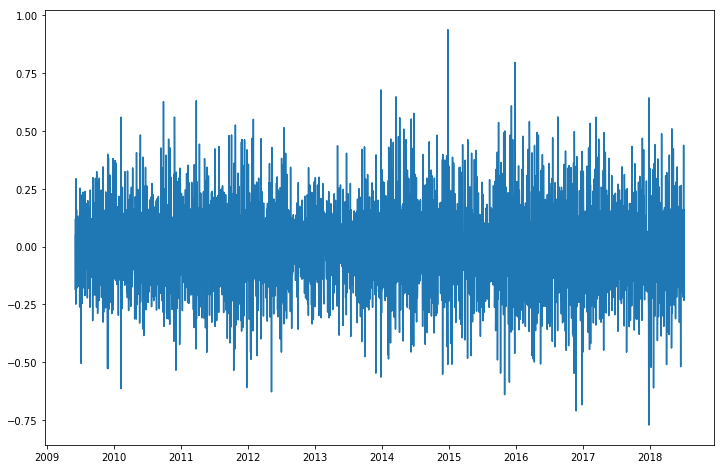

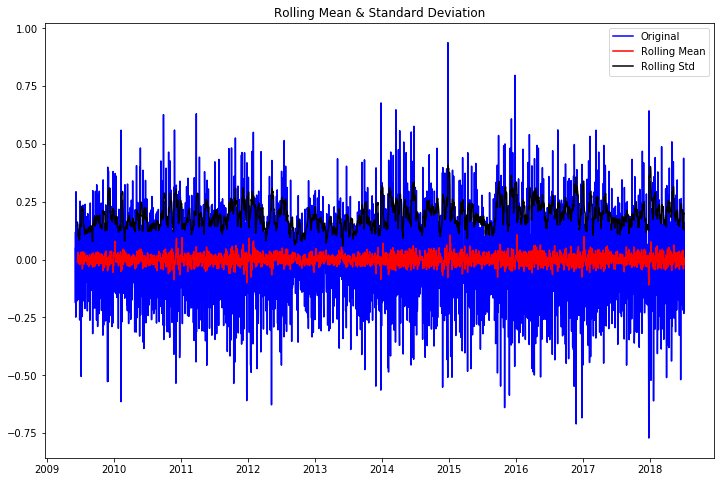

Results of Dickey-Fuller Test:
Test Statistic                  -19.181954
p-value                           0.000000
#Lags Used                       26.000000
Number of Observations Used    3293.000000
Critical Value (1%)              -3.432337
Critical Value (5%)              -2.862418
Critical Value (10%)             -2.567237
dtype: float64
 
Dispatch Differenced


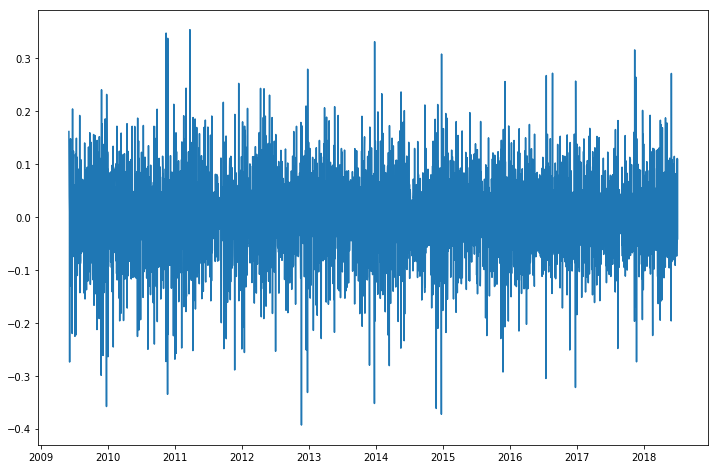

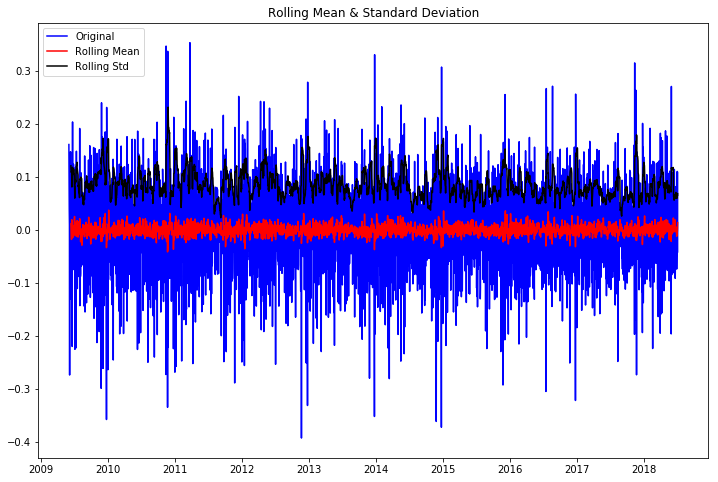

Results of Dickey-Fuller Test:
Test Statistic                -1.656734e+01
p-value                        1.883750e-29
#Lags Used                     2.700000e+01
Number of Observations Used    3.292000e+03
Critical Value (1%)           -3.432338e+00
Critical Value (5%)           -2.862418e+00
Critical Value (10%)          -2.567238e+00
dtype: float64


In [8]:
def difference(timeseries):
    fig = plt.figure(figsize=(12,8))
    ts_log_diff = np.log(timeseries) - np.log(timeseries).shift()
    plt.plot(ts_log_diff)

    ts_log_diff.dropna(inplace=True)

    test_stationarity(ts_log_diff)
    
print('Crime Differenced')
difference(df['Crime Rate'])
print(' ')
print('Person Differenced')
difference(df['Person Rate'])
print(' ')
print('Property Differenced')
difference(df['Property Rate'])
print(' ')
print('Society Differenced')
difference(df['Society Rate'])
print(' ')
print('Call Differenced')
difference(df['Call Rate'])
print(' ')
print('Onview Differenced')
difference(df['Onview Rate'])
print(' ')
print('Dispatch Differenced')
difference(df['Dispatch Rate'])

Crime Decomposed


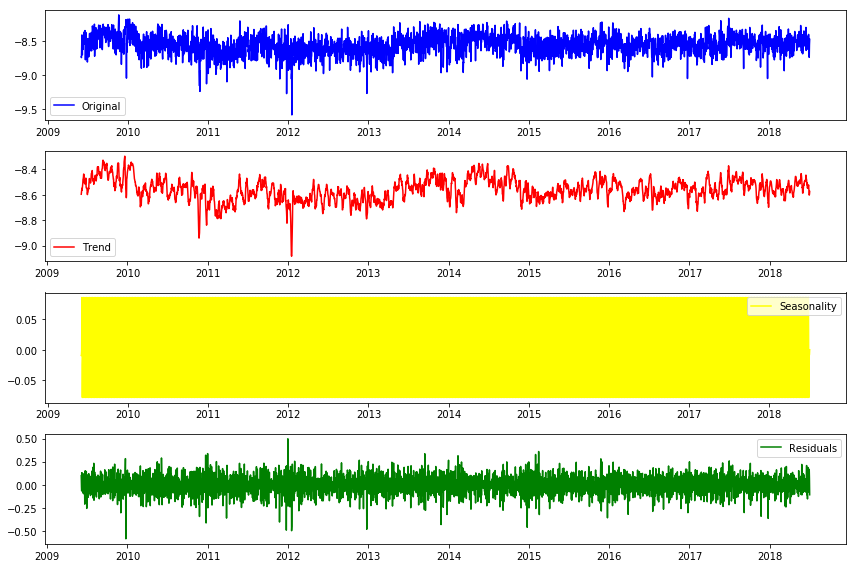

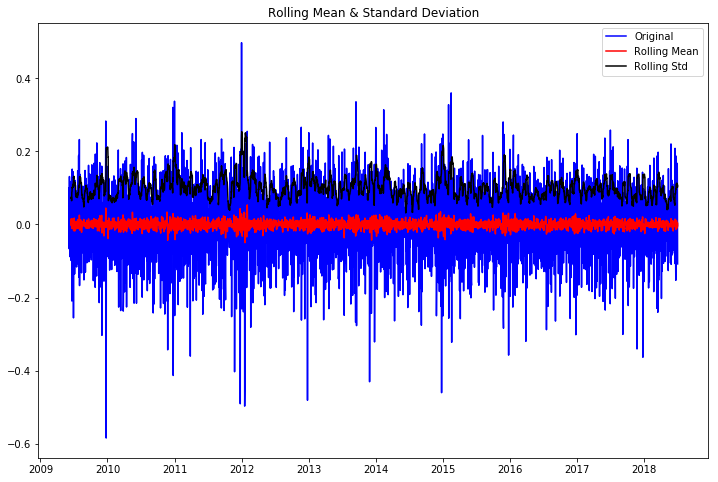

Results of Dickey-Fuller Test:
Test Statistic                  -21.880095
p-value                           0.000000
#Lags Used                       29.000000
Number of Observations Used    3285.000000
Critical Value (1%)              -3.432342
Critical Value (5%)              -2.862420
Critical Value (10%)             -2.567239
dtype: float64
 
Person Decomposed


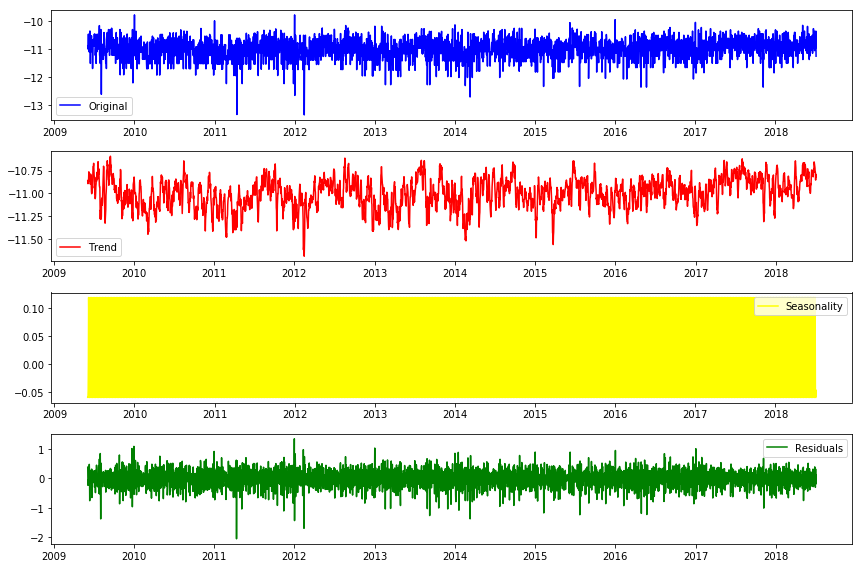

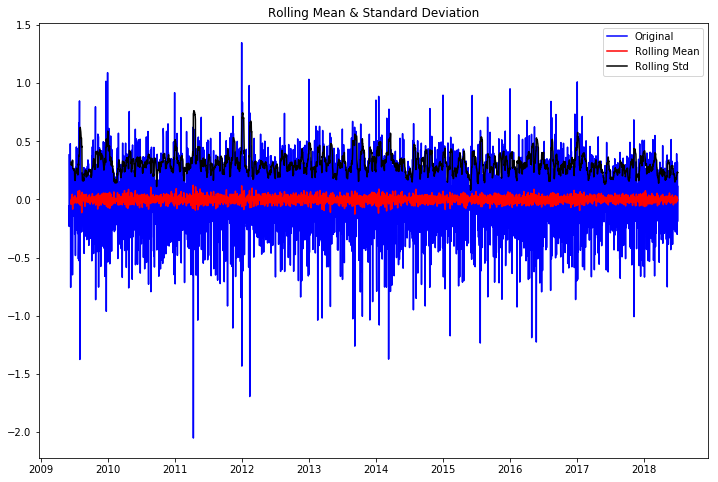

Results of Dickey-Fuller Test:
Test Statistic                  -22.191078
p-value                           0.000000
#Lags Used                       29.000000
Number of Observations Used    3285.000000
Critical Value (1%)              -3.432342
Critical Value (5%)              -2.862420
Critical Value (10%)             -2.567239
dtype: float64
 
Property Decomposed


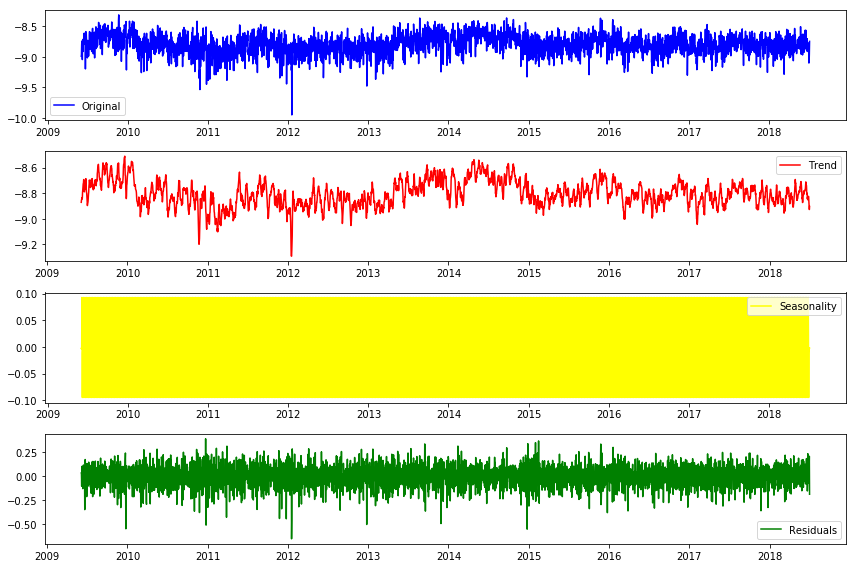

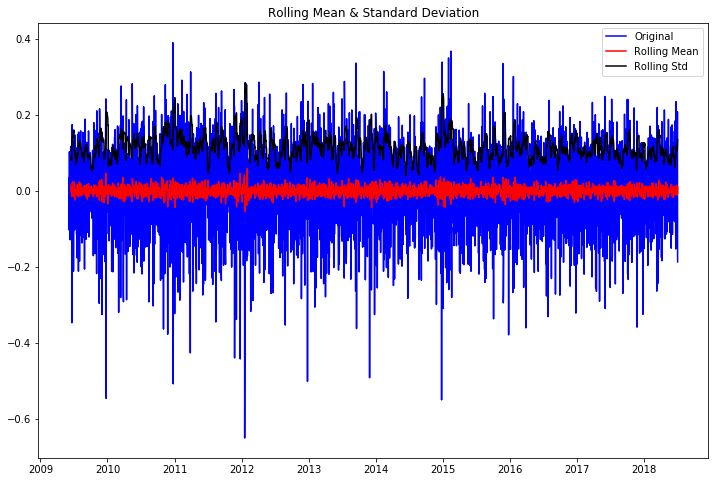

Results of Dickey-Fuller Test:
Test Statistic                  -21.889072
p-value                           0.000000
#Lags Used                       29.000000
Number of Observations Used    3285.000000
Critical Value (1%)              -3.432342
Critical Value (5%)              -2.862420
Critical Value (10%)             -2.567239
dtype: float64
 
Society Decomposed


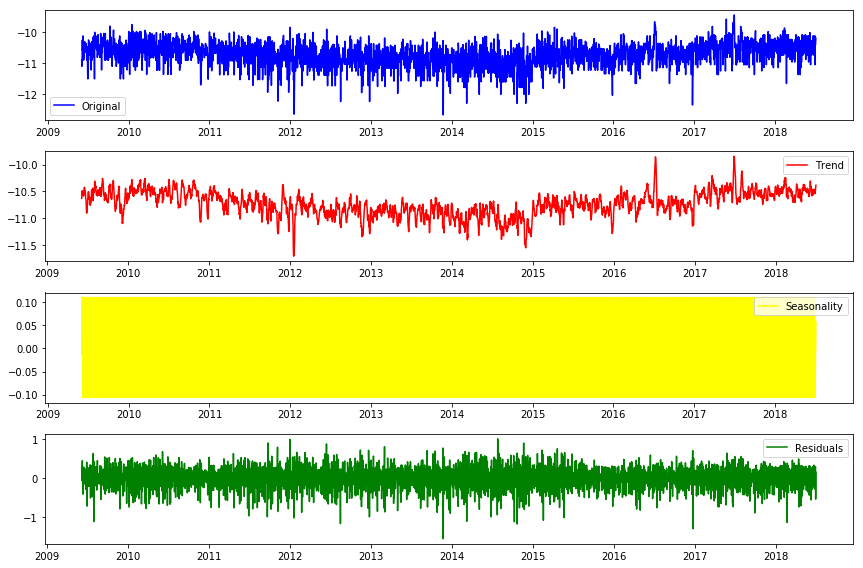

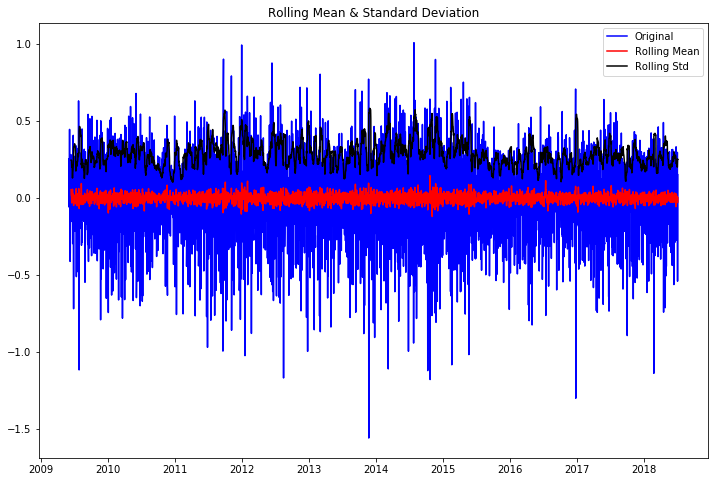

Results of Dickey-Fuller Test:
Test Statistic                  -22.183194
p-value                           0.000000
#Lags Used                       29.000000
Number of Observations Used    3285.000000
Critical Value (1%)              -3.432342
Critical Value (5%)              -2.862420
Critical Value (10%)             -2.567239
dtype: float64
 
Call Decomposed


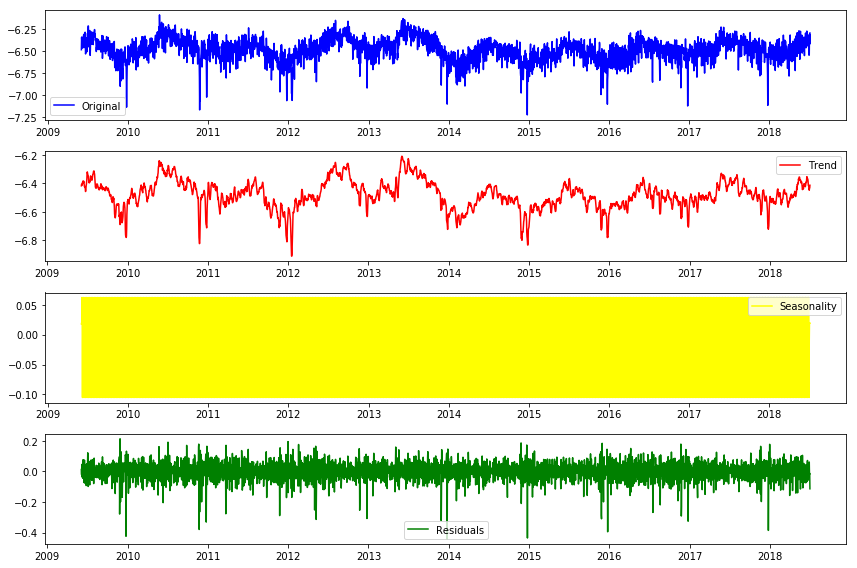

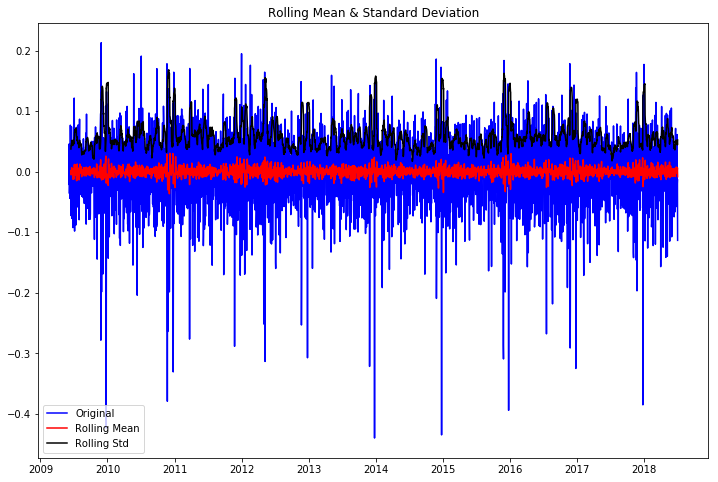

Results of Dickey-Fuller Test:
Test Statistic                  -21.893879
p-value                           0.000000
#Lags Used                       29.000000
Number of Observations Used    3285.000000
Critical Value (1%)              -3.432342
Critical Value (5%)              -2.862420
Critical Value (10%)             -2.567239
dtype: float64
 
Dispatch Decomposed


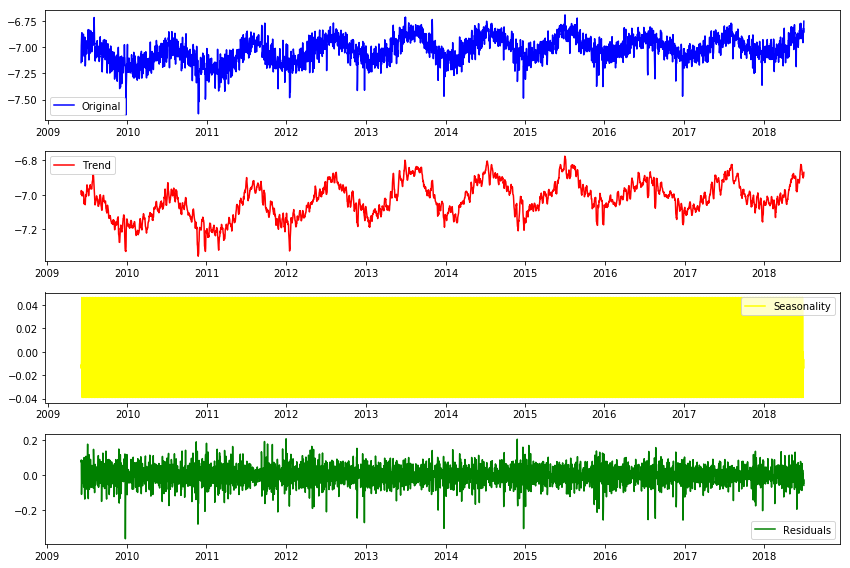

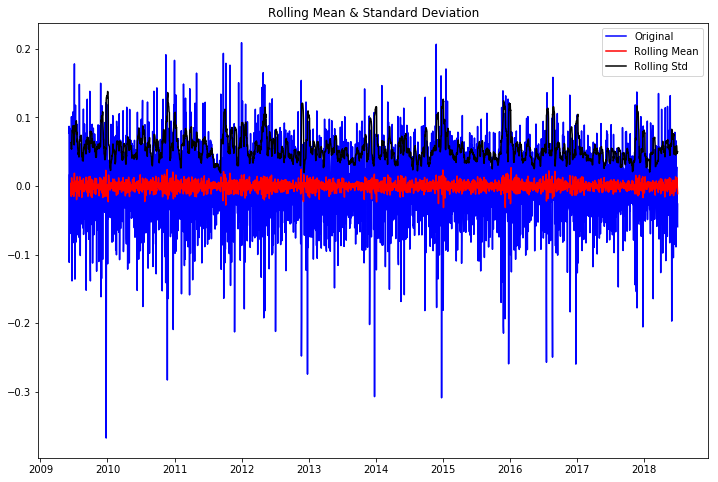

Results of Dickey-Fuller Test:
Test Statistic                  -21.438049
p-value                           0.000000
#Lags Used                       29.000000
Number of Observations Used    3285.000000
Critical Value (1%)              -3.432342
Critical Value (5%)              -2.862420
Critical Value (10%)             -2.567239
dtype: float64
 
Onview Decomposed


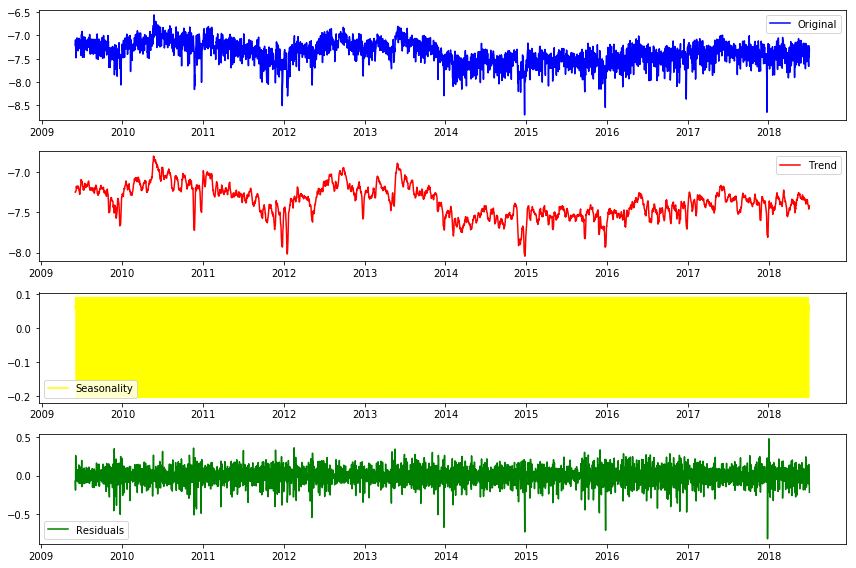

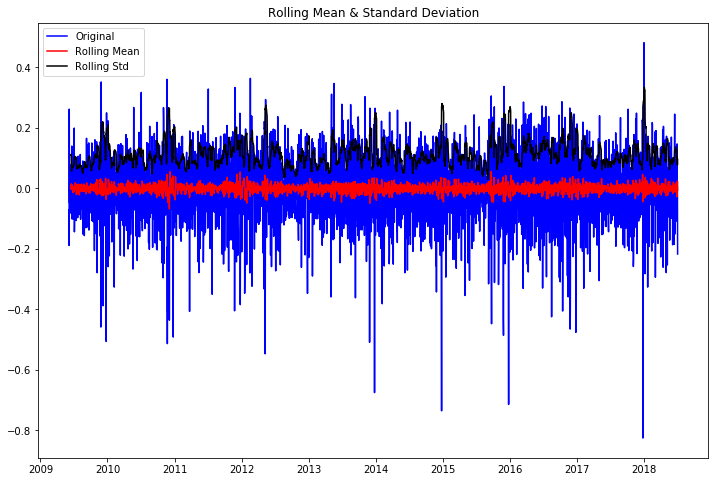

Results of Dickey-Fuller Test:
Test Statistic                  -22.535257
p-value                           0.000000
#Lags Used                       28.000000
Number of Observations Used    3286.000000
Critical Value (1%)              -3.432342
Critical Value (5%)              -2.862420
Critical Value (10%)             -2.567238
dtype: float64


In [9]:
def decompose(timeseries):
    
    ts_log = np.log(timeseries)
    decomposition = seasonal_decompose(ts_log)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    fig = plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(ts_log, label='Original', color = 'blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color = 'red')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color = 'yellow')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color = 'green')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show(block=False)
    
    trend.dropna(inplace=True)
    residual.dropna(inplace=True)
    
    test_stationarity(residual)

    
print('Crime Decomposed')
decompose(df['Crime Rate'])
print(' ')
print('Person Decomposed')
decompose(df['Person Rate'])
print(' ')
print('Property Decomposed')
decompose(df['Property Rate'])
print(' ')
print('Society Decomposed')
decompose(df['Society Rate'])
print(' ')
print('Call Decomposed')
decompose(df['Call Rate'])
print(' ')
print('Dispatch Decomposed')
decompose(df['Dispatch Rate'])
print(' ')
print('Onview Decomposed')
decompose(df['Onview Rate'])

## Selecting a Model

### Univariate ARIMA - Manual

C:\Users\atherll\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\atherll\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\atherll\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(s

                             ARIMA Model Results                              
Dep. Variable:          D.Person Rate   No. Observations:                 3320
Model:                 ARIMA(5, 1, 0)   Log Likelihood               35081.422
Method:                       css-mle   S.D. of innovations              0.000
Date:                Fri, 27 Jul 2018   AIC                         -70148.843
Time:                        13:04:51   BIC                         -70106.089
Sample:                    06-03-2009   HQIC                        -70133.544
                         - 07-05-2018                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.628e-09   3.12e-08     -0.052      0.958   -6.28e-08    5.95e-08
ar.L1.D.Person Rate    -0.8054      0.017    -47.447      0.000      -0.839      -0.772
ar.L2.D.Person R

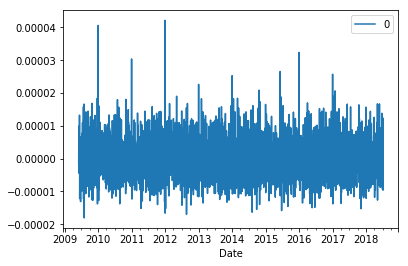

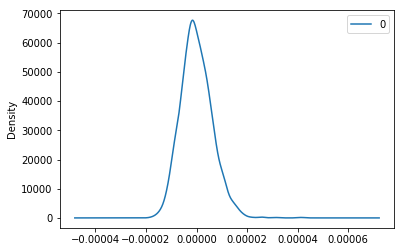

                  0
count  3.320000e+03
mean   8.096006e-09
std    6.233487e-06
min   -1.806953e-05
25%   -4.200175e-06
50%   -4.574308e-07
75%    3.872411e-06
max    4.218321e-05


In [10]:
def manual_arima(timeseries):

    model = ARIMA(timeseries, order=(5,1,0))
    model_fit = model.fit(disp=0)
    print(model_fit.summary())
    # plot residual errors
    residuals = pd.DataFrame(model_fit.resid)
    residuals.plot()
    pyplot.show()
    residuals.plot(kind='kde')
    pyplot.show()
    print(residuals.describe())
    
manual_arima(df['Person Rate'])

### Univariate - Auto ARIMA

As the Dispatch Rate is not theoretically indpendent of the Crime Rate, or its component parts (property, person, soceity), lets eliminate it. Crime Rate (person, property, soceity) is the dependant varaible focus. Onview is the primary independent variable. Time series diagnostics indicate signficant seasonality across all DV / IV's. Auto-ARIMA selected with AIC / BIC as optimization criteria.  

In [ ]:
import cufflinks as cf
from pyramid.arima import auto_arima

def a_arima(timeseries):
    
    stepwise_model = auto_arima(timeseries, start_p=1, start_q=1,
                               max_p=3, max_q=3, m=12,
                               start_P=0, seasonal=True,
                               d=1, D=1, trace=True,
                               error_action='ignore',  
                               suppress_warnings=True, 
                               stepwise=True)
    #print(stepwise_model.aic())
   
    # Split into Test / Train
    train = df.loc['2009-06-02 00:00:00':'2017-12-31 00:00:00']
    test = df.loc['2018-01-01 00:00:00':]

    # Train the Model
    stepwise_model.fit(train)
    
    # Forecast
    future_forecast = stepwise_model.predict(n_periods=182)
    future_forecast
    future_forecast = pd.DataFrame(future_forecast, index = test.index, column=['Prediction'])
    pd.concat([test,future_forecast],axis=1).iplot()
    
a_arima(df['Onview Rate'])

C:\Users\atherll\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


C:\Users\atherll\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




### Multivariate LSTM Forecast Model

In [ ]:
from matplotlib import pyplot
# load dataset
df1 = pd.read_excel('timeseries.xlsx')
values = df1.values

# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15]

i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df1.columns[group], y=0.5, loc='right')
    pyplot.figure(figsize=(12,10))
    i += 1
pyplot.show()